Task 1


In [ ]:
import requests
from bs4 import BeautifulSoup

def get_patent_claims(patent_number):
    url = f"https://patents.google.com/patent/{patent_number}/en"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve page for {patent_number}")
        return []

    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the claims section by looking for divs with the class 'claim'
    claims_section = soup.find('section', {'itemprop': 'claims'})

    if not claims_section:
        print(f"No claims section found for {patent_number}")
        return []

    # Extract the text of each claim inside the 'claim-text' divs
    claims_text = []
    for claim in claims_section.find_all('div', class_='claim'):
        claim_text_div = claim.find('div', class_='claim-text')
        if claim_text_div:
            claims_text.append(claim_text_div.get_text(separator=' ', strip=True))

    return claims_text

patent_numbers = ['GB2478972A', 'US9634864B2', 'US9980046B2']
all_claims = []

for patent_number in patent_numbers:
    claims = get_patent_claims(patent_number)
    print(f"Extracted {len(claims)} claims for {patent_number}")
    all_claims.extend(claims)

# Save claims to a file or process them further
with open('patent_claims.txt', 'w') as f:
    for claim in all_claims:
        f.write("%s\n" % claim)

print(f"Extracted {len(all_claims)} claims.")


Extracted 14 claims for GB2478972A
Extracted 24 claims for US9634864B2
Extracted 23 claims for US9980046B2
Extracted 61 claims.


Task 2


In [ ]:
# Save claims to a file
with open('patent_claims.txt', 'w') as f:
    for claim in all_claims:
        f.write("%s\n" % claim)

# Count the number of claims collected
num_claims = len(all_claims)

print(f"Total number of claims collected: {num_claims}")



# For further processing and display using pandas
import pandas as pd

# Load claims
with open('patent_claims.txt', 'r') as f:
    claims = f.readlines()

# Convert to DataFrame for better visualization
claims_df = pd.DataFrame(claims, columns=['Claim Text'])
claims_df['Claim Text'] = claims_df['Claim Text'].str.strip()  # Clean up any extra whitespace

# Display first few claims
print(claims_df.head())


Total number of claims collected: 61
                                          Claim Text
0  CLAIMS1. A wireless telephone apparatus compri...
1  2. The apparatus of claim 1, ftirther comprisi...
2  3. The apparatus of claim 1, 2 or 3, ftirther ...
3  4. The apparatus of claim 3, wherein the first...
4  5. The apparatus of claim 3 or 4, wherein the ...


**Method 1: K-Means Clustering**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the claims using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(claims)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Display the result
kmeans_results = pd.DataFrame({'Claim': claims, 'KMeans_Label': kmeans_labels})
print(kmeans_results.head())


                                               Claim  KMeans_Label
0  CLAIMS1. A wireless telephone apparatus compri...             2
1  2. The apparatus of claim 1, ftirther comprisi...             2
2  3. The apparatus of claim 1, 2 or 3, ftirther ...             2
3  4. The apparatus of claim 3, wherein the first...             2
4  5. The apparatus of claim 3 or 4, wherein the ...             2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Method 2: Latent Dirichlet Allocation (LDA)**



LDA is a method to discover hidden topics in a set of documents by analyzing the patterns of word occurrence, helping to understand the main themes present in the text

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_labels = lda.fit_transform(X).argmax(axis=1)

# Display the result
lda_results = pd.DataFrame({'Claim': claims, 'LDA_Label': lda_labels})
print(lda_results.head(10))


                                               Claim  LDA_Label
0  CLAIMS1. A wireless telephone apparatus compri...          0
1  2. The apparatus of claim 1, ftirther comprisi...          0
2  3. The apparatus of claim 1, 2 or 3, ftirther ...          0
3  4. The apparatus of claim 3, wherein the first...          2
4  5. The apparatus of claim 3 or 4, wherein the ...          0
5  6. The apparatus of any one of claims 3 to 5, ...          2
6  7. The apparatus of any one of claims 3 to 6, ...          2
7  8. The apparatus of any one of the preceding c...          0
8  9. The apparatus of claim 8, further comprisin...          0
9  10. The apparatus of claim 8 or 9, wherein the...          0


**Method 3: BERT Embeddings with K-Means Clustering**

BERT embeddings with K-Means clustering combines the strength of deep contextual text representation with efficient clustering, making it a powerful method for grouping similar text data based on their meaning and context.


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load pre-trained BERT model and get embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(claims)

# Compute cosine similarity and apply K-Means Clustering
kmeans_bert = KMeans(n_clusters=3, random_state=42)
bert_labels = kmeans_bert.fit_predict(embeddings)

# Display the result
bert_results = pd.DataFrame({'Claim': claims, 'BERT_Label': bert_labels})
print(bert_results.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


                                               Claim  BERT_Label
0  CLAIMS1. A wireless telephone apparatus compri...           0
1  2. The apparatus of claim 1, ftirther comprisi...           0
2  3. The apparatus of claim 1, 2 or 3, ftirther ...           0
3  4. The apparatus of claim 3, wherein the first...           0
4  5. The apparatus of claim 3 or 4, wherein the ...           0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Compare Methods**


In [92]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Combine results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Claim': claims,
    'KMeans_Label': kmeans_labels,
    'LDA_Label': lda_labels,
    'BERT_Label': bert_labels
})

# Display the combined results
print(comparison_df.head(10))

# Function to print claims in each group
def print_grouped_claims(df, method_label):
    grouped = df.groupby(method_label)
    for label, group in grouped:
        print(f"\nGroup {label}:")
        for claim in group['Claim']:
            print(f" - {claim.strip()[:100]}...")

# Function to compute silhouette score
def compute_silhouette_score(embeddings, labels):
    score = silhouette_score(embeddings, labels)
    return score

# Function to visualize clusters
def visualize_clusters(embeddings, labels, method_name):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=embeddings[:, 0], y=embeddings[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(f'Clusters visualization for {method_name}')
    plt.show()

# Print groups for each method
print("K-Means Clustering Groups:")
print_grouped_claims(comparison_df, 'KMeans_Label')

print("\nLDA Groups:")
print_grouped_claims(comparison_df, 'LDA_Label')

print("\nBERT Embeddings with K-Means Clustering Groups:")
print_grouped_claims(comparison_df, 'BERT_Label')

# Compute and print silhouette scores
kmeans_silhouette = compute_silhouette_score(embeddings, kmeans_labels)
lda_silhouette = compute_silhouette_score(embeddings, lda_labels)
bert_silhouette = compute_silhouette_score(embeddings, bert_labels)
print("")
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"LDA Silhouette Score: {lda_silhouette}")
print(f"BERT Embeddings with K-Means Silhouette Score: {bert_silhouette}")




                                               Claim  KMeans_Label  LDA_Label  \
0  CLAIMS1. A wireless telephone apparatus compri...             2          0   
1  2. The apparatus of claim 1, ftirther comprisi...             2          0   
2  3. The apparatus of claim 1, 2 or 3, ftirther ...             2          0   
3  4. The apparatus of claim 3, wherein the first...             2          2   
4  5. The apparatus of claim 3 or 4, wherein the ...             2          0   
5  6. The apparatus of any one of claims 3 to 5, ...             2          2   
6  7. The apparatus of any one of claims 3 to 6, ...             2          2   
7  8. The apparatus of any one of the preceding c...             2          0   
8  9. The apparatus of claim 8, further comprisin...             2          0   
9  10. The apparatus of claim 8 or 9, wherein the...             2          0   

   BERT_Label  
0           2  
1           2  
2           2  
3           2  
4           2  
5           

# Comparison Criteria

**t-SNE Visualization** - These are used to reduce the dimensionality of the embeddings and visualize the clusters in 2D space.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


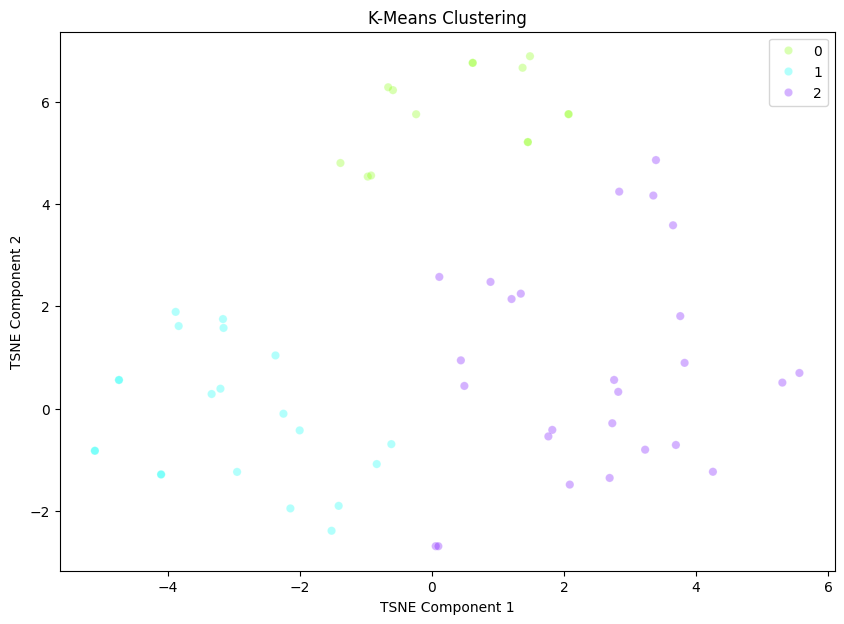

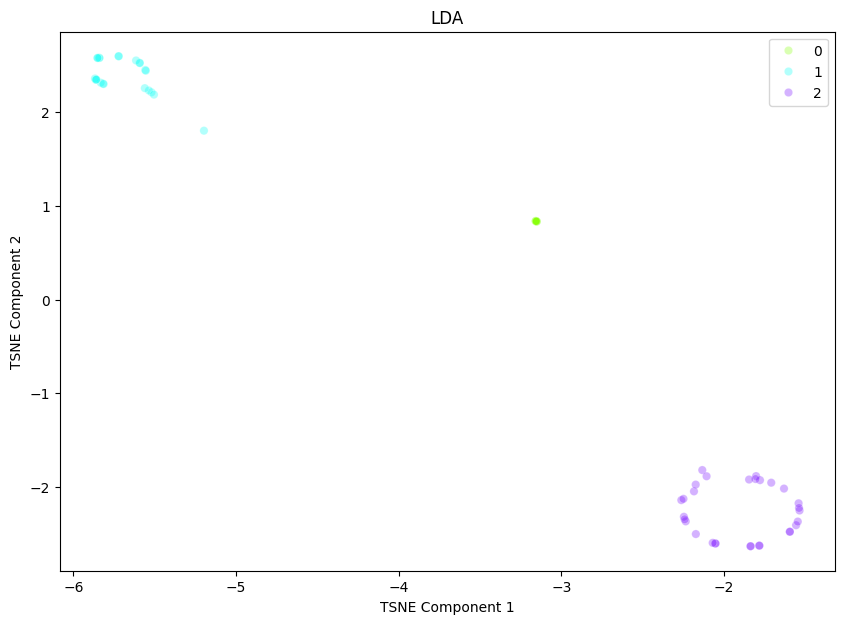

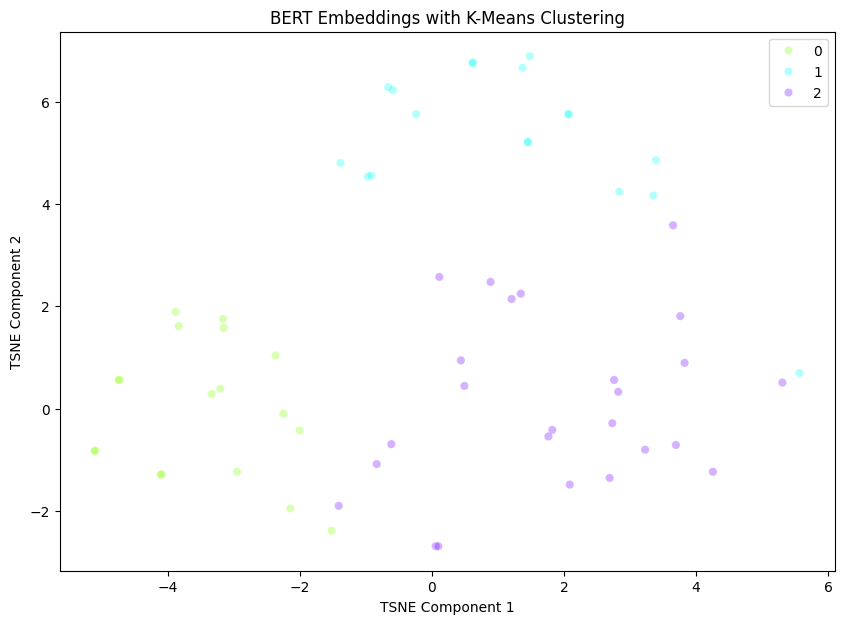

In [ ]:
# Install the required package
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Load claims
with open('patent_claims.txt', 'r') as f:
    claims = f.readlines()

# Method 1: K-Means Clustering
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(claims)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
kmeans_labels = kmeans.labels_

# Method 2: LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda_labels = lda.fit_transform(X).argmax(axis=1)

# Method 3: BERT Embeddings with K-Means Clustering
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(claims)
cosine_sim = cosine_similarity(embeddings)
kmeans_bert = KMeans(n_clusters=3, random_state=42).fit(cosine_sim)
bert_labels = kmeans_bert.labels_

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plotting function
def plot_clusters(embeddings_2d, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
        hue=labels, palette=sns.color_palette("hsv", len(set(labels))),
        legend="full", alpha=0.3
    )
    plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

# Plot K-Means Clustering
plot_clusters(embeddings_2d, kmeans_labels, 'K-Means Clustering')

# Apply t-SNE to LDA topic distribution
lda_embeddings_2d = tsne.fit_transform(lda.fit_transform(X))
plot_clusters(lda_embeddings_2d, lda_labels, 'LDA')

# Plot BERT Embeddings with K-Means Clustering
plot_clusters(embeddings_2d, bert_labels, 'BERT Embeddings with K-Means Clustering')


** PCA Visualization ** - dimensionality reduction technique that can help visualize high-dimensional data in 2D.


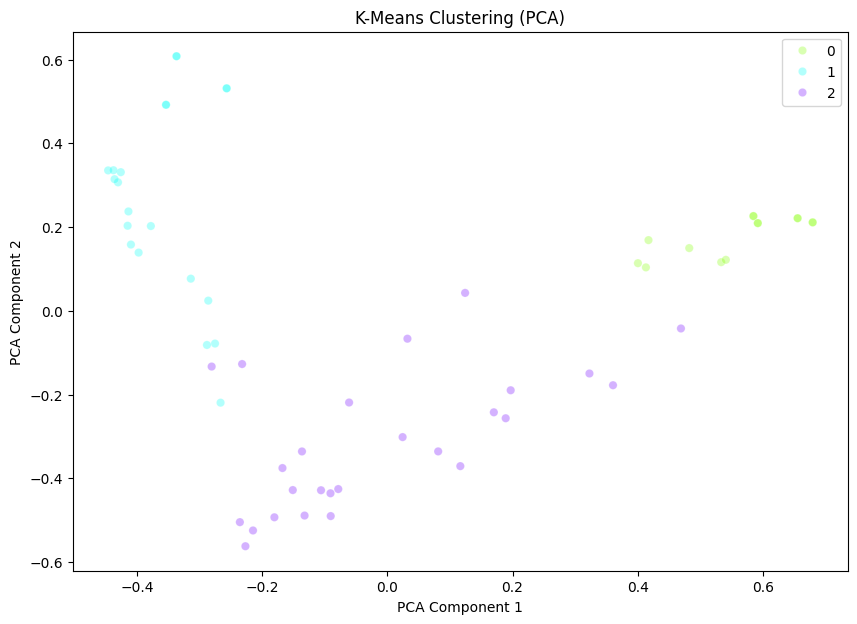

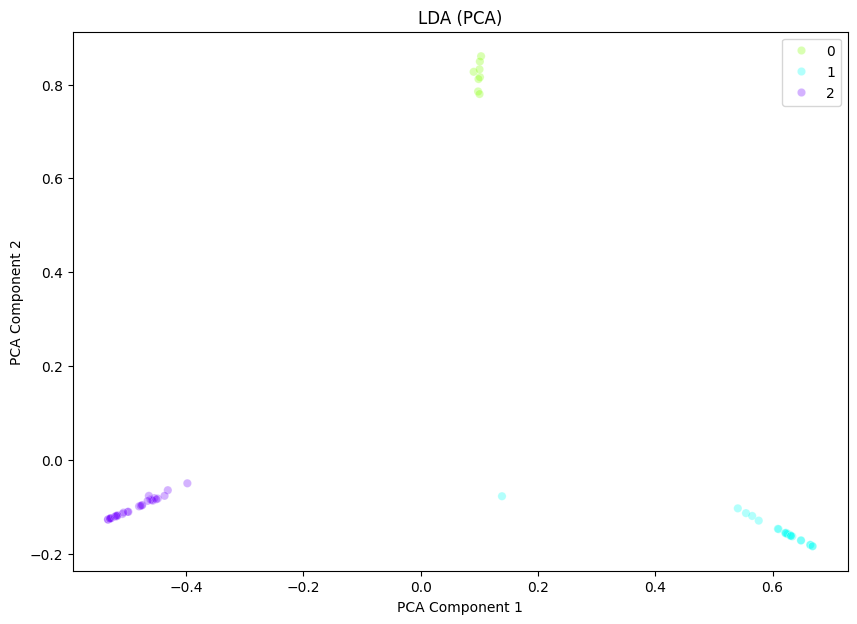

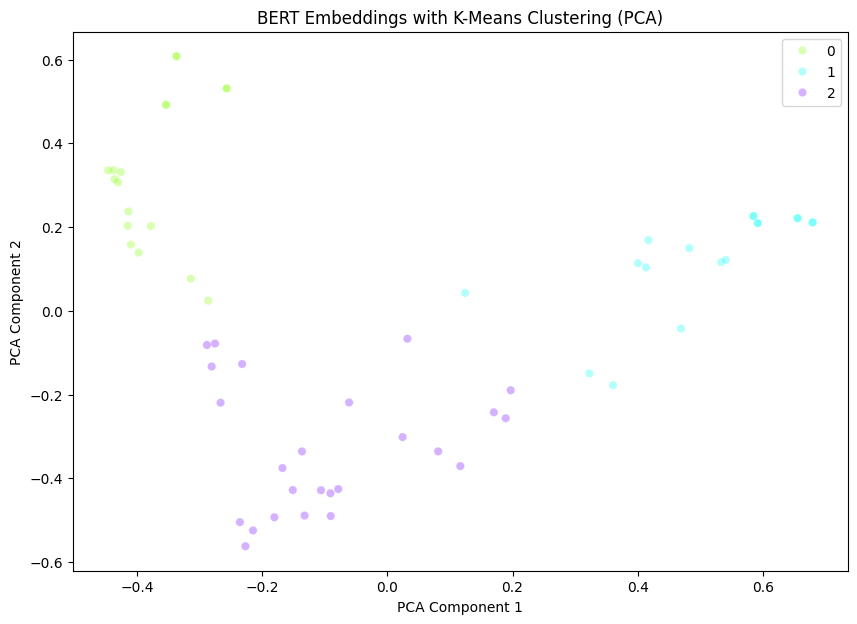

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
embeddings_pca_2d = pca.fit_transform(embeddings)

# Plotting function
def plot_pca_clusters(embeddings_2d, labels, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
        hue=labels, palette=sns.color_palette("hsv", len(set(labels))),
        legend="full", alpha=0.3
    )
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot K-Means Clustering using PCA
plot_pca_clusters(embeddings_pca_2d, kmeans_labels, 'K-Means Clustering (PCA)')

# Plot LDA using PCA
lda_pca_2d = pca.fit_transform(lda.fit_transform(X))
plot_pca_clusters(lda_pca_2d, lda_labels, 'LDA (PCA)')

# Plot BERT Embeddings with K-Means Clustering using PCA
plot_pca_clusters(embeddings_pca_2d, bert_labels, 'BERT Embeddings with K-Means Clustering (PCA)')


**Silhouette Analysis** - Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.

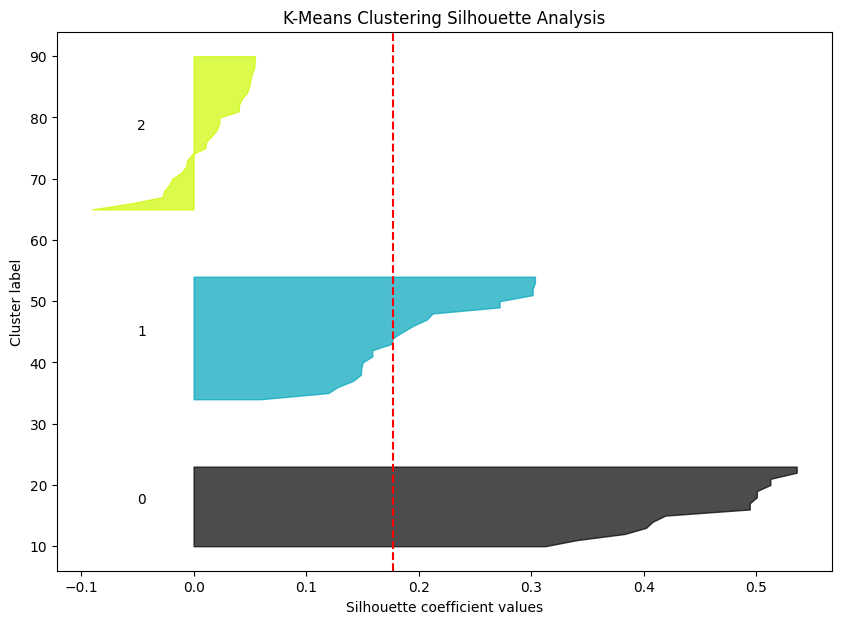

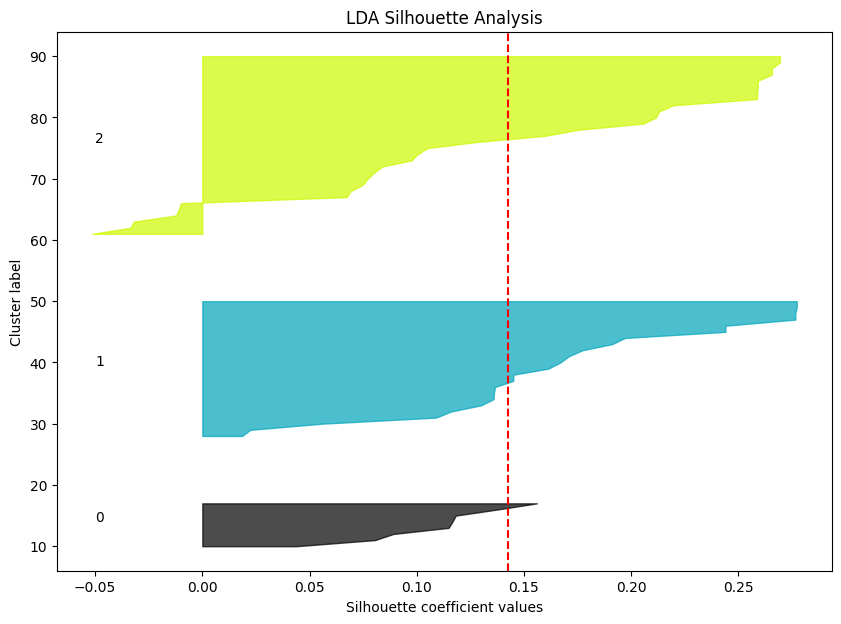

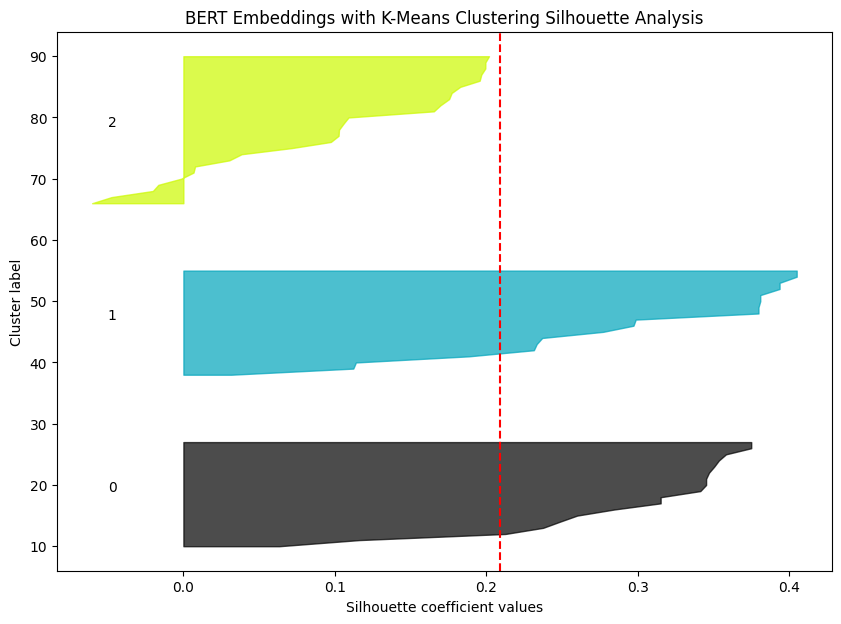

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def plot_silhouette_analysis(X, labels, title):
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    plt.figure(figsize=(10, 7))
    y_lower = 10
    for i in range(len(set(labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / len(set(labels)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(title)
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

# Plot Silhouette Analysis for K-Means Clustering
plot_silhouette_analysis(X, kmeans_labels, 'K-Means Clustering Silhouette Analysis')

# Plot Silhouette Analysis for LDA
plot_silhouette_analysis(X, lda_labels, 'LDA Silhouette Analysis')

# Plot Silhouette Analysis for BERT Embeddings with K-Means Clustering
plot_silhouette_analysis(embeddings, bert_labels, 'BERT Embeddings with K-Means Clustering Silhouette Analysis')


In [89]:
def print_grouped_claims(df, method_label):
    grouped = df.groupby(method_label)
    for label, group in grouped:
        print(f"\nGroup {label}:")
        for claim in group['Claim']:
            print(f" - {claim.strip()[:100]}...")

print("K-Means Clustering Groups:")
print_grouped_claims(comparison_df, 'KMeans_Label')

print("\nLDA Groups:")
print_grouped_claims(comparison_df, 'LDA_Label')

print("\nBERT Embeddings with K-Means Clustering Groups:")
print_grouped_claims(comparison_df, 'BERT_Label')


K-Means Clustering Groups:

Group 0:
 - 1. A Method for a Media Gateway in connection to a backbone, comprising the steps of: measuring a pa...
 - 1. A Method for a Media Gateway in connection to a backbone, comprising the steps of: measuring a pa...
 - 9. A Method for a Mobile Switching Centre Server in connection to a backbone, comprising the steps o...
 - 9. A Method for a Mobile Switching Centre Server in connection to a backbone, comprising the steps o...
 - 10. The method according to claim 9 , wherein said step of detecting comprises: measuring a call gra...
 - 11. The method according to claim 9 , wherein said step of detecting further comprises: receiving an...
 - 12. The method according to claim 9 , wherein said step of detecting further comprises: receiving an...
 - 13. A Media Gateway comprising: means for connecting to a backbone; said means for connecting are co...
 - 13. A Media Gateway comprising: means for connecting to a backbone; said means for connecting are co...


## Chosen Method: BERT Embeddings with K-Means Clustering




BERT Embeddings with K-Means Clustering is better because:



*   Context Understanding: BERT captures the meaning and context of claims.
*   Effective Grouping: K-Means organizes claims into clear, related groups.
*   Flexibility: It adapts well to different types of claims.


For an interactive application, this method is ideal because:

* Accurate Results: Users get meaningful claim groups.
* Dynamic Interaction: It handles various input claims efficiently.
* User-Friendly: Clear groups make navigation and understanding easy.